# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Victor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("keys.env")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q = "bitcoin", language = "en")

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q = "ethereum", language = "en")

In [6]:
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [7]:
bitcoin_df = create_df(bitcoin_headlines["articles"])
ethereum_df = create_df(ethereum_headlines["articles"])

In [8]:
def build_sent_score(df):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": []
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": []
    }

    # Get sentiment for the text and the title
    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            
            if(row["text"] != None):
                text_sentiment = analyzer.polarity_scores(row["text"])
                text_sent["text_compound"].append(text_sentiment["compound"])
                text_sent["text_pos"].append(text_sentiment["pos"])
                text_sent["text_neu"].append(text_sentiment["neu"])
                text_sent["text_neg"].append(text_sentiment["neg"])
            else:
                text_sent["text_compound"].append(0)
                text_sent["text_pos"].append(0)
                text_sent["text_neu"].append(0)
                text_sent["text_neg"].append(0)
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    new_df = df.join(title_sentiment_df).join(text_sentiment_df)

    return new_df

In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sent = build_sent_score(bitcoin_df)
bitcoin_sent.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110
1,Is Bitcoin a safe bet?,The digital cryptocurrency Bitcoin has tripled...,None,2021-02-20,0.4404,0.492,0.508,0.000,0.0000,0.000,0.000,0.000
2,Teen hacker behind the big Twitter hack senten...,The hacker behind last year’s big Twitter hack...,The hacker behind last years big Twitter hack\...,2021-03-16,-0.5267,0.000,0.694,0.306,-0.5106,0.000,0.858,0.142
3,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,2021-02-26,-0.5423,0.000,0.696,0.304,0.6369,0.113,0.887,0.000
4,How bitcoin is like a teenager,With the value of bitcoin in the market toppin...,None,2021-02-21,0.3612,0.385,0.615,0.000,0.0000,0.000,0.000,0.000


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sent = build_sent_score(ethereum_df)
ethereum_sent.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000
1,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110
2,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,0.0000,0.000,1.000,0.000,-0.3400,0.063,0.818,0.119
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,0.2263,0.192,0.808,0.000,-0.1531,0.000,0.938,0.062
4,What are NFTs? Everything you need to know.,NFTs are the latest cryptocurrency rage these ...,NFTs are the latest cryptocurrency rage these ...,2021-03-06,0.0000,0.000,1.000,0.000,-0.4588,0.066,0.789,0.145


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.041980,0.08620,0.838450,0.075350,0.135060,0.053200,0.776000,0.020850
std,0.357329,0.16085,0.164396,0.121768,0.406573,0.071962,0.341071,0.044423
min,-0.557400,0.00000,0.508000,0.000000,-0.557400,0.000000,0.000000,0.000000
25%,-0.445000,0.00000,0.709500,0.000000,0.000000,0.000000,0.850750,0.000000
50%,0.000000,0.00000,0.816500,0.000000,0.000000,0.000000,0.888500,0.000000
75%,0.079550,0.05625,1.000000,0.175250,0.480150,0.094250,0.968500,0.000000
max,0.585900,0.49200,1.000000,0.306000,0.831600,0.246000,1.000000,0.142000


In [12]:
# Describe the Ethereum Sentiment
ethereum_sent.describe()

,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.070350,0.05140,0.851950,0.096650,0.142910,0.063700,0.904350,0.031950
std,0.317344,0.11736,0.173349,0.155574,0.386361,0.051028,0.062628,0.048716
min,-0.709600,0.00000,0.526000,0.000000,-0.557400,0.000000,0.789000,0.000000
25%,-0.146575,0.00000,0.709500,0.000000,-0.038275,0.000000,0.861750,0.000000
50%,0.000000,0.00000,0.935000,0.000000,0.160900,0.068500,0.913000,0.000000
75%,0.000000,0.00000,1.000000,0.143750,0.449150,0.096250,0.938250,0.064500
max,0.718400,0.42900,1.000000,0.474000,0.709600,0.144000,1.000000,0.145000


### Questions:

Q: Which coin had the highest mean positive score?

A: Based on headlines (titles), Bitcoin has the highest mean positive sentiment score (0.086 vs 0.051), but based on body text, Ethereum has the higher mean positive score (0.064 vs 0.053).

Q: Which coin had the highest compound score?

A: Based on headlines, Bitcoin has the highest mean compound score (-0.042 vs -0.07), but based on body, Ethereum has the highest mean compound score (0.143 vs 0.135).

Q. Which coin had the highest negative score?

A: Based on both headlines (0.097 vs 0.075) and body (0.032 vs 0.021), Ethereum has the highest mean negative score.



---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {"reuters", "ha", "stafffile", "photo", "poster", "pr", "cnw", "one", "according"} 

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return output

In [16]:
def build_tokens(df):
    tokens = {
        "tokens": []
    }
    
    # Get sentiment for the text 
    for index, row in df.iterrows():
        try:            
            if(row["text"] != None):
                tokens["tokens"].append(tokenizer(row["text"]))
            else:
                tokens["tokens"].append("")
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    tokens_df = pd.DataFrame(tokens)
    new_df = df.join(tokens_df)

    return new_df

In [19]:
# Create a new tokens column for Bitcoin
bitcoin_token_df = build_tokens(bitcoin_sent)
bitcoin_token_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,tokens
0,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110,"[strictest, crackdown, worldwidephoto, michele..."
1,Is Bitcoin a safe bet?,The digital cryptocurrency Bitcoin has tripled...,None,2021-02-20,0.4404,0.492,0.508,0.000,0.0000,0.000,0.000,0.000,
2,Teen hacker behind the big Twitter hack senten...,The hacker behind last year’s big Twitter hack...,The hacker behind last years big Twitter hack\...,2021-03-16,-0.5267,0.000,0.694,0.306,-0.5106,0.000,0.858,0.142,"[hacker, behind, last, year, big, twitter, hac..."
3,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery — at least...,Some things are best left a mystery at least a...,2021-02-26,-0.5423,0.000,0.696,0.304,0.6369,0.113,0.887,0.000,"[thing, best, left, mystery, least, far, coinb..."
4,How bitcoin is like a teenager,With the value of bitcoin in the market toppin...,None,2021-02-21,0.3612,0.385,0.615,0.000,0.0000,0.000,0.000,0.000,


In [20]:
# Create a new tokens column for Ethereum
ethereum_token_df = build_tokens(ethereum_sent)
ethereum_token_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,text_compound,text_pos,text_neu,text_neg,tokens
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,0.0000,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,"[famed, auction, house, christies, sold, first..."
1,India will reportedly introduce bill to make o...,India’s legislature is reportedly considering ...,One of the strictest crackdowns worldwide\r\nP...,2021-03-15,-0.5574,0.000,0.714,0.286,-0.5574,0.000,0.890,0.110,"[strictest, crackdown, worldwidephoto, michele..."
2,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,0.0000,0.000,1.000,0.000,-0.3400,0.063,0.818,0.119,"[worried, geforce, rtx, sold, cryptocurrency, ..."
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,0.2263,0.192,0.808,0.000,-0.1531,0.000,0.938,0.062,"[heres, everything, need, know, nonfungible, t..."
4,What are NFTs? Everything you need to know.,NFTs are the latest cryptocurrency rage these ...,NFTs are the latest cryptocurrency rage these ...,2021-03-06,0.0000,0.000,1.000,0.000,-0.4588,0.066,0.789,0.145,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
def bigram_counter(doc): 
    processed = tokenizer(doc)
    bigrams = ngrams(processed, n=2)
    top_20 = dict(Counter(bigrams).most_common(20))
    return pd.DataFrame(list(top_20.items()), columns=['bigram', 'count'])

In [23]:
# Generate the Bitcoin N-grams where N=2
bitcoin_str = str(list(bitcoin_token_df["tokens"]))
bigram_counter(bitcoin_str)

,bigram,count
0,"(last, year)",2
1,"(cryptocurrency, exchange)",2
2,"(alltime, high)",2
3,"(elon, musk)",2
4,"(get, char)",2
5,"(investment, giveaway)",2
6,"(virtual, currency)",2
7,"(illustration, taken)",2
8,"(strictest, crackdown)",1
9,"(crackdown, worldwidephoto)",1


In [24]:
# Generate the Ethereum N-grams where N=2
ethereum_str = str(list(ethereum_token_df["tokens"]))
bigram_counter(ethereum_str)

,bigram,count
0,"(nonfungible, token)",3
1,"(record, high)",3
2,"(cryptocurrency, miner)",2
3,"(latest, cryptocurrency)",2
4,"(char, nfts)",2
5,"(cryptocurrency, platform)",2
6,"(char, new)",2
7,"(new, york)",2
8,"(ethereum, second)",2
9,"(second, largest)",2


In [25]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_processed = tokenizer(bitcoin_str)
print(dict(token_count(bitcoin_processed, 10)))

{'char': 17, 'bitcoin': 9, 'cryptocurrency': 5, 'new': 4, 'exchange': 3, 'morning': 3, 'high': 3, 'investment': 3, 'trading': 3, 'cryptocurrencies': 2}


In [27]:
# Use token_count to get the top 10 words for Ethereum
ethereum_processed = tokenizer(ethereum_str)
print(dict(token_count(ethereum_processed, 10)))

{'char': 19, 'cryptocurrency': 11, 'ethereum': 8, 'new': 6, 'digital': 5, 'week': 5, 'token': 4, 'nfts': 4, 'company': 4, 'high': 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

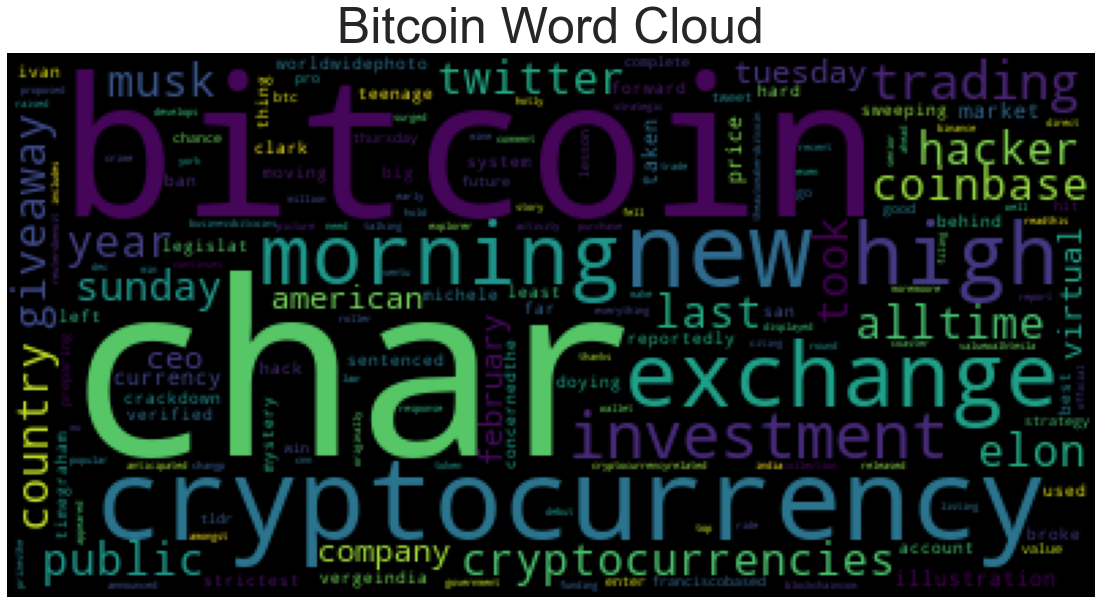

In [29]:
# Generate the Bitcoin word cloud
bitcoin_wc_str = ' '.join(bitcoin_processed)
bitcoin_wc = WordCloud().generate(bitcoin_wc_str)
plt.imshow(bitcoin_wc)
plt.axis("off")
plt.title("Bitcoin Word Cloud", fontsize = 50)
plt.show()

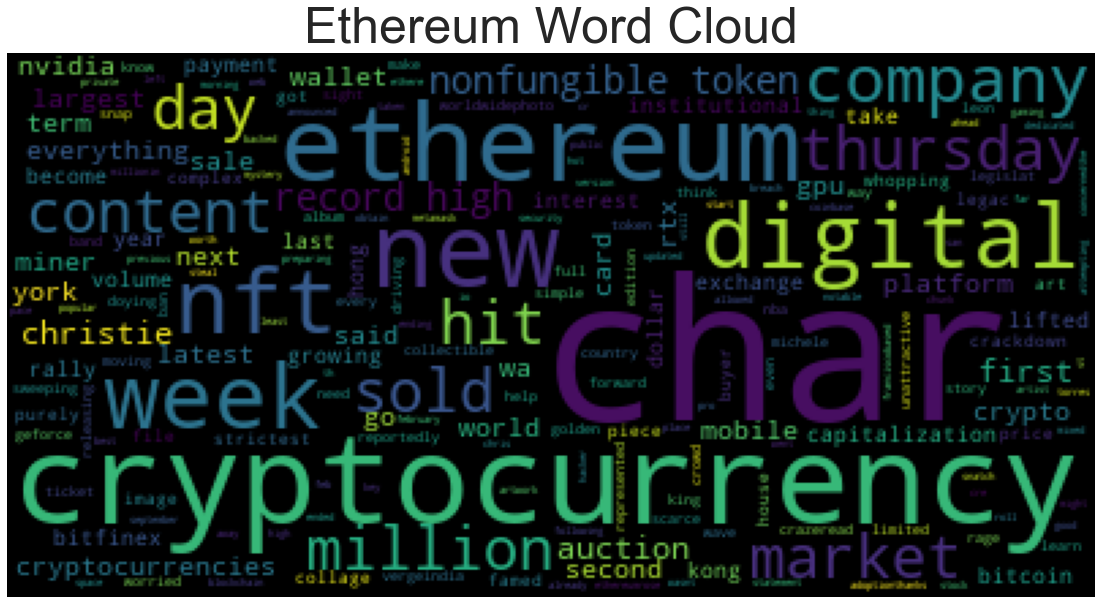

In [30]:
# Generate the Ethereum word cloud
ethereum_wc_str = ' '.join(ethereum_processed)
ethereum_wc = WordCloud().generate(ethereum_wc_str)
plt.imshow(ethereum_wc)
plt.axis("off")
plt.title("Ethereum Word Cloud", fontsize = 50)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [32]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [34]:
# Concatenate all of the Bitcoin text together
bitcoin_doc = ""
for i in range(0, len(bitcoin_df)):
    bitcoin_doc += str(bitcoin_df.text[i])

In [35]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_doc)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [36]:
# Render the visualization
displacy.render(bitcoin_ner, style = 'ent')

In [37]:
# List all Entities
bitcoin_entities = [ent.text for ent in bitcoin_ner.ents]
bitcoin_entities

['One',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'last years',
 'Twitter',
 'Graham Ivan Clark',
 'Twitters',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'this morning',
 'over $50,000',
 'over $12,000',
 'CNN',
 'above $58,000',
 'Sunday',
 'just above $46,000',
 'Tuesday',
 'India',
 'Reuters',
 '$120 million',
 'Moore Strategic Ventu',
 'chars]This morning',
 'Coinbase',
 'American',
 '19, 2021',
 'Elon Musk',
 'Binance',
 'Changp',
 'Reuters',
 'Dec. 8, 2017',
 'Benoit Tessier/Illustration',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'January 21, 2021',
 'Reuters',
 'Reuters',
 'Feb 21',
 'Reuters',
 'Sunday',
 'two-month',
 '$1 trillion',
 'Friday',
 'Reuters',
 'Pristina',
 'Kosovo',
 'June 12, 2018',
 'HONG KONG',
 'Reuters Breakingviews',
 'Feb. 19, 2021',
 'Evolve',
 'week of February',
 'North American',
 '7',
 'one',
 'above $50,000',
 'Tuesday',
 'morning',
 'noon',
 'Eastern Time',
 'around $48,500',
 'Bitcoin']

---

### Ethereum NER

In [38]:
# Concatenate all of the Ethereum text together
ethereum_doc = ""
for i in range(0, len(ethereum_df)):
    ethereum_doc += str(ethereum_df.text[i])

In [39]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_doc)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [40]:
# Render the visualization
displacy.render(ethereum_ner, style = 'ent')

In [41]:
# List all Entities
ethereum_entities = [ent.text for ent in ethereum_ner.ents]
ethereum_entities

['Christies',
 'first',
 '$69 million',
 '5,000',
 'Photo',
 'Michele Doying',
 'India',
 'Reuters',
 'GeForce',
 '3060',
 'GPU',
 'these days',
 'Kings',
 'NBA',
 'millions',
 'Ethereum',
 'first',
 "Christie's",
 'NFT',
 'a few days',
 'Chris Torres',
 'one',
 'Ethereum',
 'September 2020',
 '3060',
 'GPU',
 'next week',
 'Nvidia',
 'this morning',
 'about $5.7 million',
 'chars]NEW YORK',
 'Reuters',
 'second',
 'Thursday',
 'chars]NEW YORK',
 'Feb 18',
 'Reuters',
 'second',
 'Thursday',
 '7.34%',
 'the week ending 21st February',
 '11.65%',
 'the previous week',
 'Ethereum ended',
 'the week',
 '1,935.57',
 'the week',
 'Coinbase',
 'San Francisco',
 'last year',
 'Thursday',
 'Bitfinex',
 'Bitfinex',
 'millions of dollars',
 'Reuters',
 'SINGAPORE',
 'Reuters',
 'Asian',
 'Saturday',
 'two-month',
 '$1 trillion',
 'a day earlier',
 'World FX',
 'Kevin Buckland',
 'Reuters',
 'Meitu',
 'Hong Kong',
 'China',
 'March 24, 2017',
 'Bobby Yip',
 'HONG KONG',
 'Reuters',
 'Hong Ko',
 '

---